### cleaning the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [2]:
coffee = pd.read_csv('../Data/Raw_data/Coffee Chain.txt', sep='\t')
coffee.head()


,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,记录数,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,2012-10-01 00:00:00.000,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,2012-10-01 00:00:00.000,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,2012-10-01 00:00:00.000,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,2012-10-01 00:00:00.000,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,2012-10-01 00:00:00.000,650,110,Major Market,West,23,1,...,Green Tea,56,182,California,20,60,50,80,54,Regular


In [3]:
coffee['Profit'].value_counts()

 27     20
 47     20
 30     19
-4      18
 28     17
        ..
 459     1
 463     1
-332     1
 579     1
-605     1
Name: Profit, Length: 238, dtype: int64

In [4]:
coffee['Target Profit'].value_counts()

 30     146
 40     128
 50     106
 20      98
 10      82
 60      62
 80      60
 0       48
 70      42
 90      32
 130     30
 110     30
 120     24
 100     24
 140     16
 160     14
 170     12
-10      12
 230      6
 240      6
 190      6
 150      6
 210      6
-150      4
 320      4
-170      4
 300      4
-100      4
 200      4
 310      2
-50       2
-130      2
 470      2
-60       2
-280      2
 290      2
-90       2
 180      2
 350      2
-190      2
 420      2
-210      2
 250      2
 360      2
-120      2
 390      2
 450      2
 330      2
 340      2
-320      2
Name: Target Profit, dtype: int64

In [5]:
coffee.tail()

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,记录数,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
1057,775,250,133,2013-12-01 00:00:00.000,1820,251,Small Market,West,70,1,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,2013-12-01 00:00:00.000,817,133,Small Market,West,29,1,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,2013-12-01 00:00:00.000,8252,-294,Small Market,West,111,1,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,2013-12-01 00:00:00.000,690,186,Small Market,West,41,1,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular
1061,435,20,-22,2013-12-01 00:00:00.000,218,25,Small Market,West,7,1,...,Green Tea,-22,48,Utah,10,20,0,30,40,Regular


In [6]:
#display all the columns in the dataset
pd.set_option('display.max_columns', None)
coffee.head()

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,记录数,Product Line,Product Type,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,2012-10-01 00:00:00.000,503,71,Major Market,Central,46,1,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,2012-10-01 00:00:00.000,405,71,Major Market,Central,17,1,Leaves,Herbal Tea,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,2012-10-01 00:00:00.000,419,64,Major Market,South,13,1,Leaves,Herbal Tea,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,2012-10-01 00:00:00.000,871,56,Major Market,East,10,1,Leaves,Tea,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,2012-10-01 00:00:00.000,650,110,Major Market,West,23,1,Leaves,Tea,Green Tea,56,182,California,20,60,50,80,54,Regular


In [7]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Area Code                                    1062 non-null   int64 
 1   Cogs                                         1062 non-null   int64 
 2   Difference Between Actual and Target Profit  1062 non-null   int64 
 3   Date                                         1062 non-null   object
 4   Inventory                                    1062 non-null   int64 
 5   Margin                                       1062 non-null   int64 
 6   Market Size                                  1062 non-null   object
 7   Market                                       1062 non-null   object
 8   Marketing                                    1062 non-null   int64 
 9   记录数                                          1062 non-null   int64 
 10  Product Line

In [8]:
coffee.columns

Index(['Area Code', 'Cogs', 'Difference Between Actual and Target Profit',
       'Date', 'Inventory', 'Margin', 'Market Size', 'Market', 'Marketing',
       '记录数', 'Product Line', 'Product Type', 'Product', 'Profit', 'Sales',
       'State', 'Target COGS', 'Target Margin', 'Target Profit',
       'Target Sales', 'Total Expenses', 'Type'],
      dtype='object')

In [9]:
coffee['记录数'].value_counts()

1    1062
Name: 记录数, dtype: int64

In [10]:
coffee['Area Code'].value_counts()

435    57
603    42
505    42
775    37
702    29
       ..
413     1
217     1
646     1
408     1
949     1
Name: Area Code, Length: 149, dtype: int64

In [11]:
# %%writefile cleaning_functions.py 

# def drop_columns(df):
    
#     df2 = df.copy()
#     df2 = df2[[ 'Date','Product', 'Product Line','Product Type', 'Type', 'Market Size',
#                       'Market','State',  'Marketing', 'Total Expenses',                      
#                      'Inventory', 'Cogs', 'Margin', 'Sales','Profit',
#                       'Difference Between Actual and Target Profit',
#                          'Target COGS', 'Target Margin',
#                        'Target Sales', 'Target Profit' ]]
    
#     return df2


# def rename_columns(df):
    
#     df2 = df.copy()
#     df2.columns = [col.lower().replace(' ', '_') for col in df2.columns]
    
#     return df2


# def clean_date_column(df):
    
#     df2 = df.copy()
    
#     df2['date'] = df2['date'].apply(lambda x: x[:7])
#     df2['date'] = pd.to_datetime(df2['date']).dt.strftime('%b-%Y')
    
#     return df2
  
    
# def preprocess_dataframe(df):
    
#     df2 = df.copy()
    
#     df2 = drop_columns(df2)
#     df2 = rename_columns(df2)
#     df2 = clean_date_column(df2)
    
#     return df2

In [12]:
# delete the '记录数', Area Code columns and rearrange the columns
coffee_subset = coffee[[ 'Date','Product', 'Product Line','Product Type', 'Type', 'Market Size',
                      'Market','State',  'Marketing', 'Total Expenses',                      
                     'Inventory', 'Cogs', 'Margin', 'Sales','Profit',
                      'Difference Between Actual and Target Profit',
                         'Target COGS', 'Target Margin',
                       'Target Sales', 'Target Profit' ]].copy()

In [13]:
coffee_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Date                                         1062 non-null   object
 1   Product                                      1062 non-null   object
 2   Product Line                                 1062 non-null   object
 3   Product Type                                 1062 non-null   object
 4   Type                                         1062 non-null   object
 5   Market Size                                  1062 non-null   object
 6   Market                                       1062 non-null   object
 7   State                                        1062 non-null   object
 8   Marketing                                    1062 non-null   int64 
 9   Total Expenses                               1062 non-null   int64 
 10  Inventory   

In [14]:
#rename the columns with lowercase
coffee_subset.columns = [col.lower().replace(' ', '_') for col in coffee_subset.columns]

In [15]:
coffee_subset.columns

Index(['date', 'product', 'product_line', 'product_type', 'type',
       'market_size', 'market', 'state', 'marketing', 'total_expenses',
       'inventory', 'cogs', 'margin', 'sales', 'profit',
       'difference_between_actual_and_target_profit', 'target_cogs',
       'target_margin', 'target_sales', 'target_profit'],
      dtype='object')

In [16]:
#checking the date column 
coffee_subset['date'].value_counts()


2012-10-01 00:00:00.000    177
2012-11-01 00:00:00.000    177
2012-12-01 00:00:00.000    177
2013-10-01 00:00:00.000    177
2013-11-01 00:00:00.000    177
2013-12-01 00:00:00.000    177
Name: date, dtype: int64

In [17]:
#cleaning the column value
coffee_subset['date'] = coffee_subset['date'].apply(lambda x: x[:7])

In [18]:
coffee_subset['date'] = pd.to_datetime(coffee_subset['date']).dt.strftime('%b-%Y')

In [19]:
coffee_subset.isna().sum()

date                                           0
product                                        0
product_line                                   0
product_type                                   0
type                                           0
market_size                                    0
market                                         0
state                                          0
marketing                                      0
total_expenses                                 0
inventory                                      0
cogs                                           0
margin                                         0
sales                                          0
profit                                         0
difference_between_actual_and_target_profit    0
target_cogs                                    0
target_margin                                  0
target_sales                                   0
target_profit                                  0
dtype: int64

In [20]:
coffee_subset.describe(include=[np.number])

,marketing,total_expenses,inventory,cogs,margin,sales,profit,difference_between_actual_and_target_profit,target_cogs,target_margin,target_sales,target_profit
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,30.433145,53.836158,815.175141,82.399247,102.423729,191.049906,60.556497,0.387006,71.676083,96.817326,168.493409,60.169492
std,25.963448,31.703526,916.156386,64.824295,91.286704,148.270317,100.516593,44.331180,65.701583,89.467176,145.955171,77.824869
min,0.000000,11.000000,-3534.000000,0.000000,-294.000000,21.000000,-605.000000,-369.000000,0.000000,-210.000000,0.000000,-320.000000
25%,13.000000,33.000000,447.000000,41.000000,51.000000,98.000000,16.250000,-15.000000,30.000000,50.000000,80.000000,20.000000
50%,22.000000,46.000000,659.000000,57.000000,73.000000,133.000000,39.500000,-3.000000,50.000000,70.000000,120.000000,40.000000
75%,40.750000,66.000000,968.000000,101.000000,130.000000,227.000000,87.000000,13.000000,90.000000,120.000000,210.000000,80.000000
max,122.000000,156.000000,8252.000000,294.000000,526.000000,815.000000,646.000000,249.000000,380.000000,580.000000,960.000000,470.000000


In [21]:
coffee_subset.describe(include=[object])

,date,product,product_line,product_type,type,market_size,market,state
count,1062,1062,1062,1062,1062,1062,1062,1062
unique,6,13,2,4,2,2,4,20
top,Oct-2012,Lemon,Beans,Espresso,Regular,Small Market,Central,California
freq,177,120,558,294,600,636,336,72


/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_11291/1782850586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrlation_matrix = coffee_subset.corr()


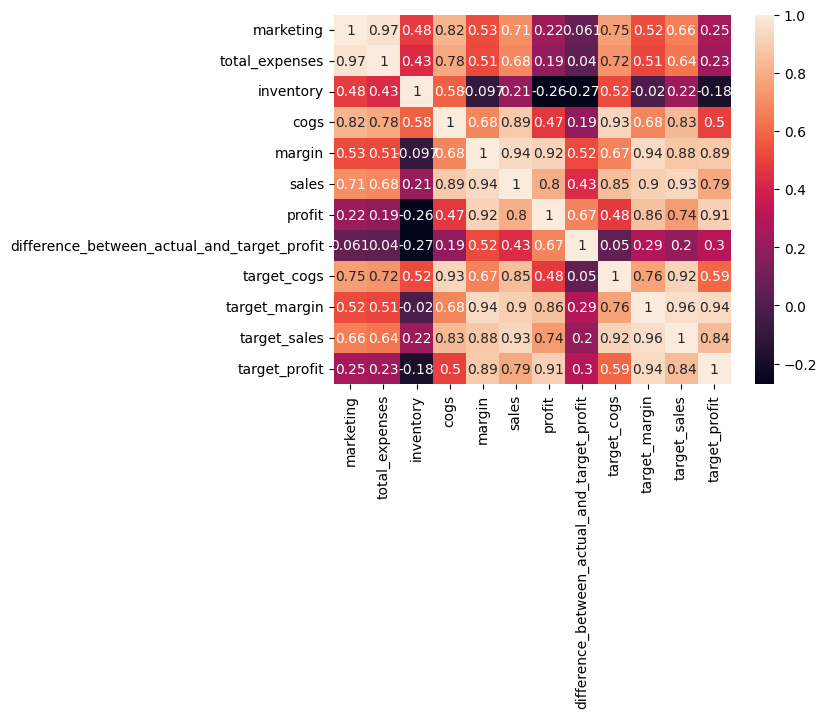

In [22]:
corrlation_matrix = coffee_subset.corr()
sns.heatmap(corrlation_matrix, annot=True)
plt.show()

In [23]:
# create heatmap with specific columns

def draw_heatmap(df, columns, cmap='coolwarm'):
    corr_matrix = df[columns].corr()
    sns.heatmap(corr_matrix, cmap=cmap)
    plt.show()


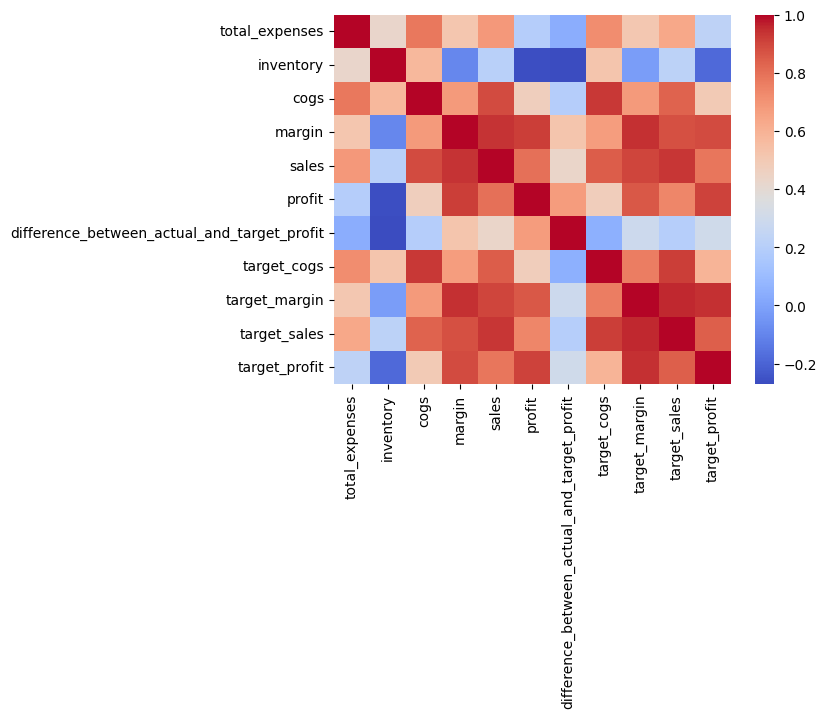

In [24]:
draw_heatmap(coffee_subset, ['total_expenses',
       'inventory', 'cogs', 'margin', 'sales', 'profit',
       'difference_between_actual_and_target_profit', 'target_cogs',
       'target_margin', 'target_sales', 'target_profit'])

In [25]:
import matplotlib.pyplot as plt

def draw_histogram(df, column_name, num_bins=20, figsize=(6,4)):
    fig, ax = plt.subplots(figsize=figsize)
    
    #create histogram of the specified column
    df[column_name].hist(bins=num_bins, ax=ax)
    
    #set title and axis labels 
    ax.set_title(f'Histogram of {column_name}')
    ax.set_xlabel("Value")
    plt.xticks(rotation=90)
    ax.set_ylabel("Frequency")
    plt.show()


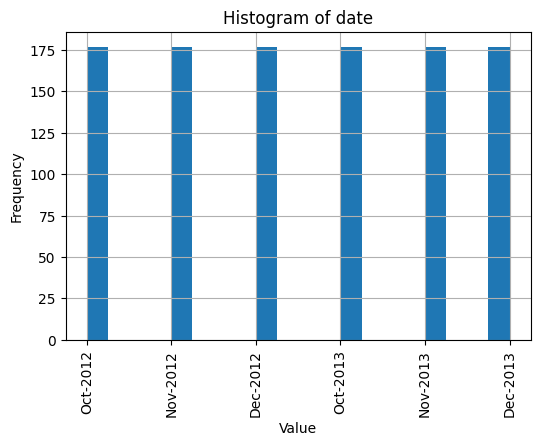

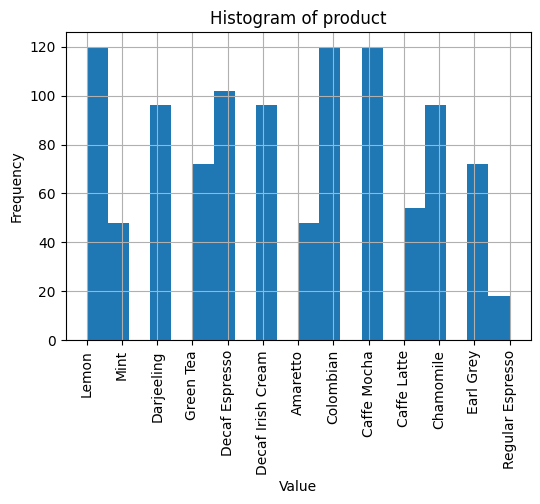

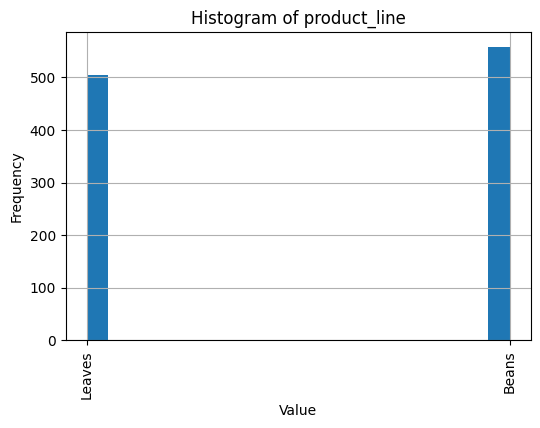

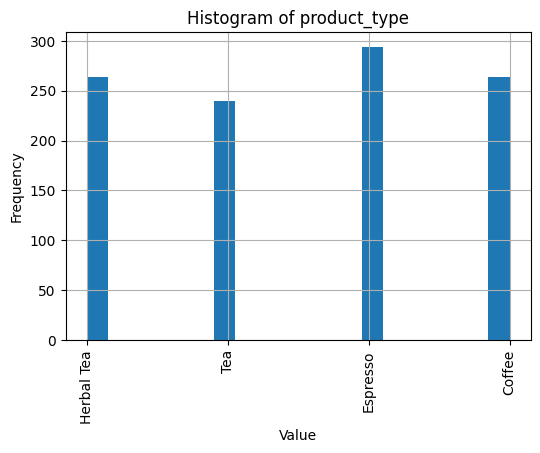

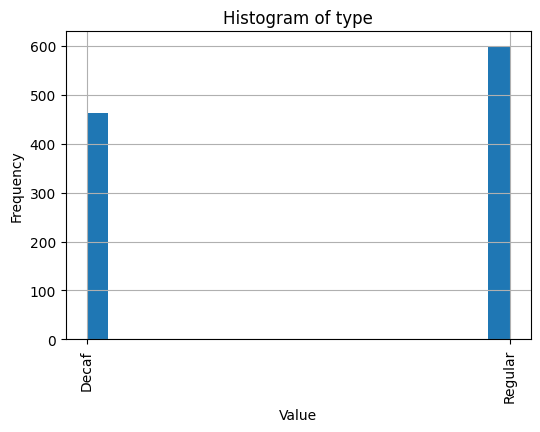

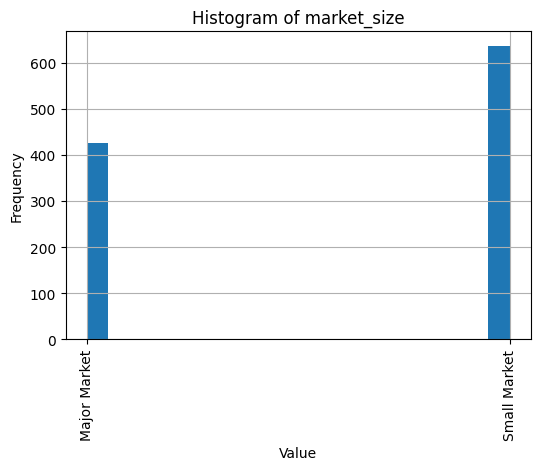

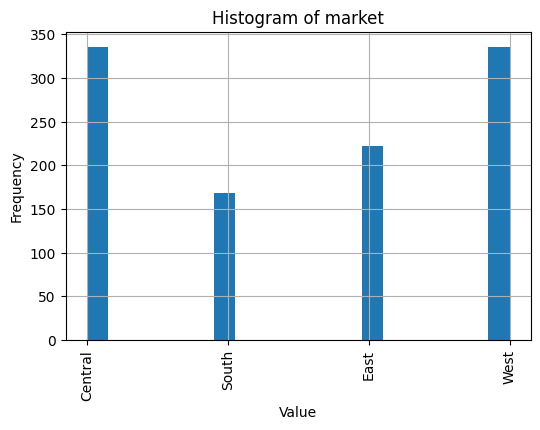

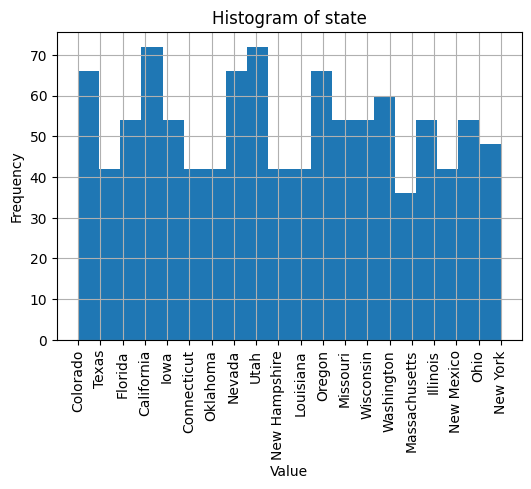

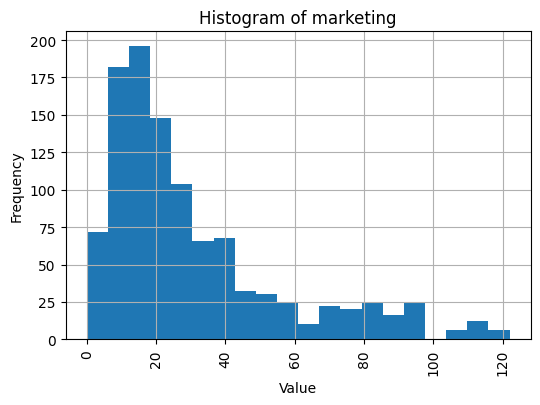

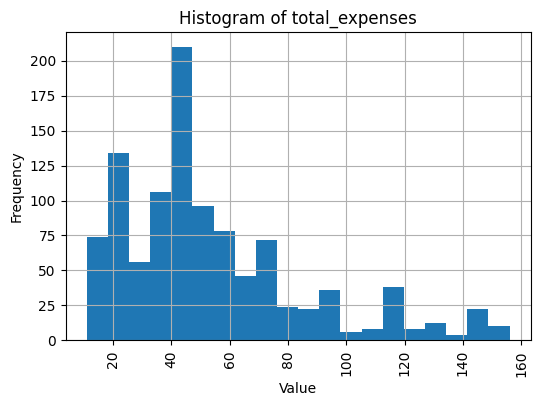

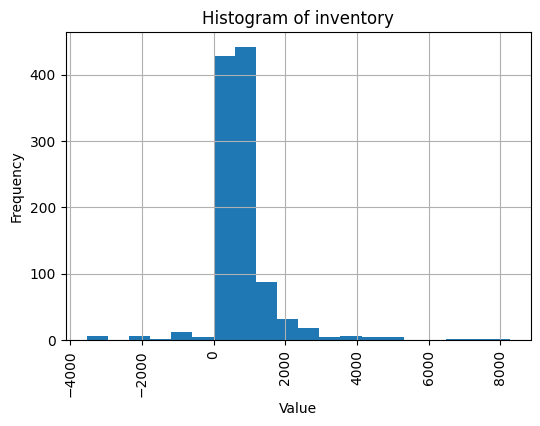

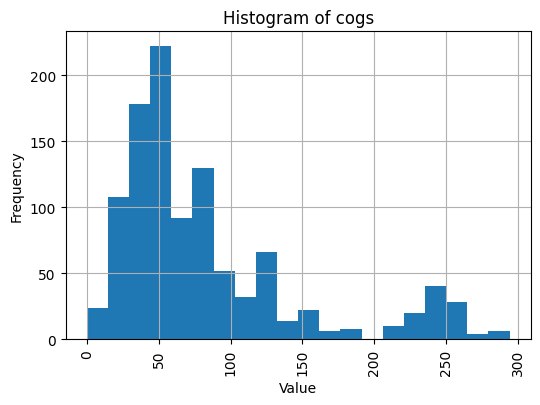

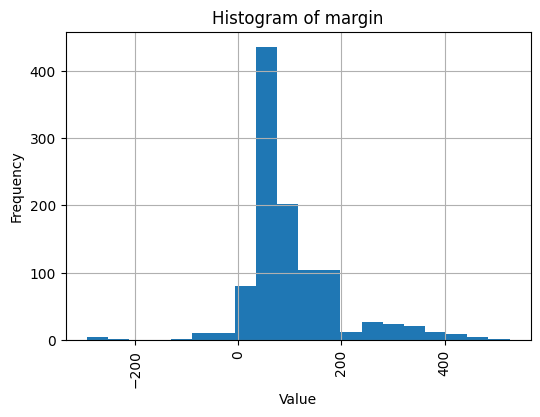

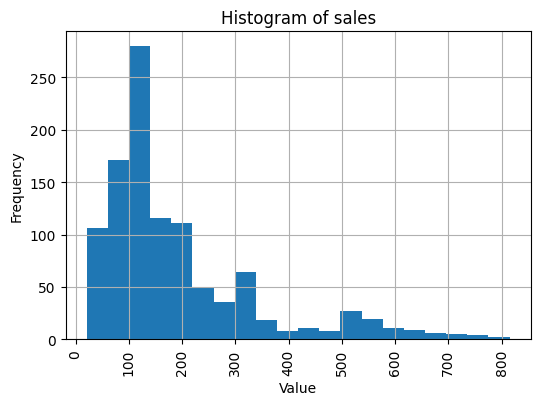

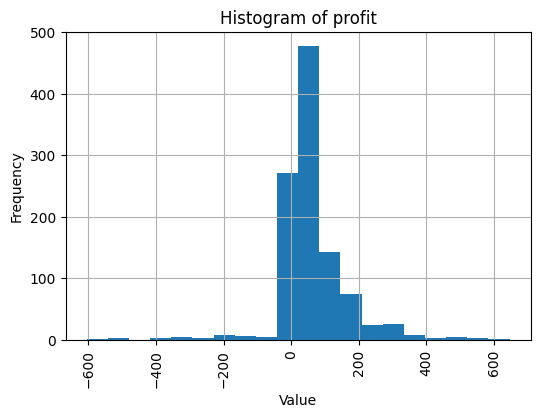

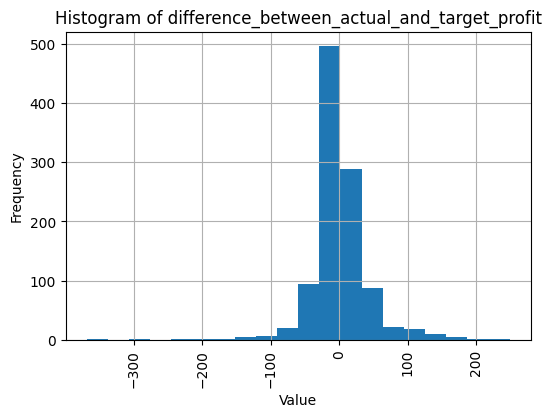

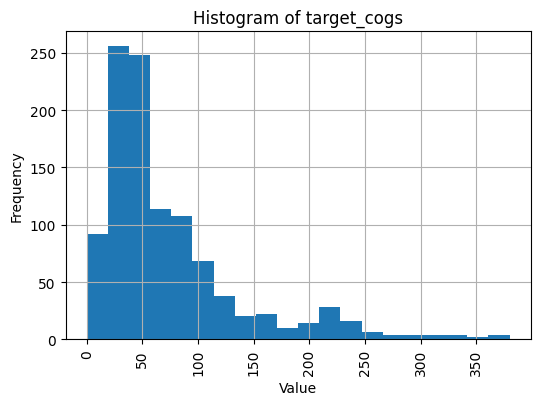

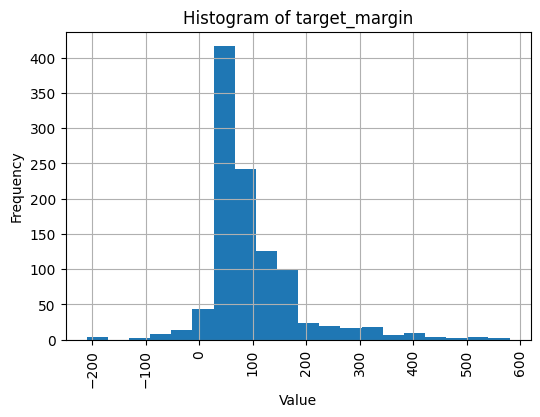

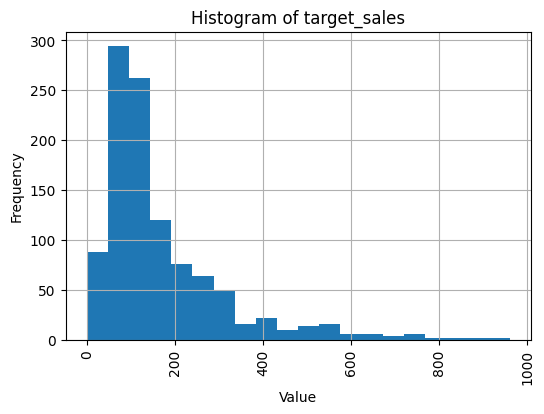

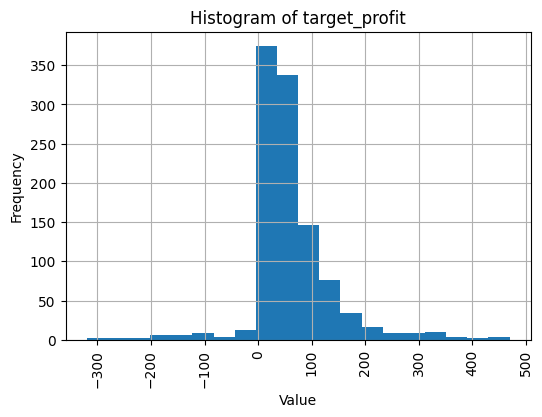

In [26]:
for column in coffee_subset.columns:
    draw_histogram(coffee_subset, column)

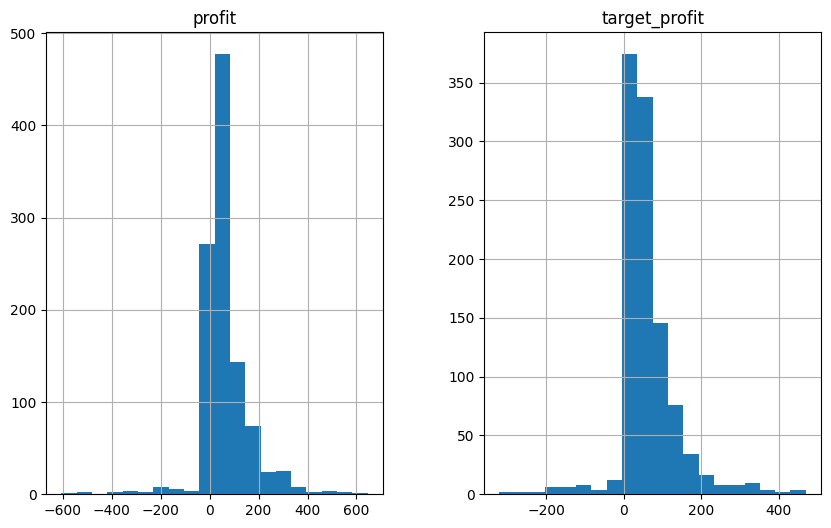

In [27]:
coffee_subset[['profit','target_profit']].hist(bins=20,figsize=(10,6))
plt.show()

In [28]:
coffee_subset.to_csv('coffee_subset.csv', index=False)
coffee_subset = pd.read_csv('coffee_subset.csv')
coffee_subset.head()

,date,product,product_line,product_type,type,market_size,market,state,marketing,total_expenses,inventory,cogs,margin,sales,profit,difference_between_actual_and_target_profit,target_cogs,target_margin,target_sales,target_profit
0,Oct-2012,Lemon,Leaves,Herbal Tea,Decaf,Major Market,Central,Colorado,46,76,503,51,71,122,-5,-35,30,60,90,30
1,Oct-2012,Mint,Leaves,Herbal Tea,Decaf,Major Market,Central,Colorado,17,45,405,52,71,123,26,-24,30,60,90,50
2,Oct-2012,Lemon,Leaves,Herbal Tea,Decaf,Major Market,South,Texas,13,36,419,43,64,107,28,-22,30,60,90,50
3,Oct-2012,Darjeeling,Leaves,Tea,Regular,Major Market,East,Florida,10,21,871,38,56,94,35,-15,40,60,100,50
4,Oct-2012,Green Tea,Leaves,Tea,Regular,Major Market,West,California,23,54,650,72,110,182,56,6,20,60,80,50


In [29]:
coffee_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   date                                         1062 non-null   object
 1   product                                      1062 non-null   object
 2   product_line                                 1062 non-null   object
 3   product_type                                 1062 non-null   object
 4   type                                         1062 non-null   object
 5   market_size                                  1062 non-null   object
 6   market                                       1062 non-null   object
 7   state                                        1062 non-null   object
 8   marketing                                    1062 non-null   int64 
 9   total_expenses                               1062 non-null   int64 
 10  inventory   

In [30]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for column in coffee_subset.select_dtypes(include='object'):
    coffee_subset[column] = le.fit_transform(coffee_subset[column])
    
# save the encoder with pickle
encoder = 'le.pkl'
with open(encoder, 'wb') as f:
    pickle.dump(le, f)
  
    

In [31]:
coffee_subset.iloc[7,:]

date                                             4
product                                          7
product_line                                     0
product_type                                     0
type                                             0
market_size                                      1
market                                           2
state                                           14
marketing                                        7
total_expenses                                  18
inventory                                      859
cogs                                            27
margin                                          39
sales                                           66
profit                                          21
difference_between_actual_and_target_profit    -39
target_cogs                                     30
target_margin                                   60
target_sales                                    90
target_profit                  

In [32]:
#Scaler numeric variables 
scaler = StandardScaler()
coffee_subset.iloc[:,7:] = scaler.fit_transform(coffee_subset.iloc[:,7:])

# save the scaler with pickle
scaler = 'scaler.pkl'
with open(scaler, 'wb') as f:
    pickle.dump(scaler, f)
  


In [33]:
coffee_subset.iloc[:,7:]

,state,marketing,total_expenses,inventory,cogs,margin,sales,profit,difference_between_actual_and_target_profit,target_cogs,target_margin,target_sales,target_profit
0,-1.409155,0.599851,0.699426,-0.340905,-0.484603,-0.344393,-0.465922,-0.652503,-0.798618,-0.634623,-0.411712,-0.538045,-0.387841
1,-1.409155,-0.517631,-0.278843,-0.447924,-0.469169,-0.344393,-0.459175,-0.343951,-0.550369,-0.634623,-0.411712,-0.538045,-0.130733
2,1.083388,-0.671766,-0.562857,-0.432636,-0.608072,-0.421111,-0.567136,-0.324044,-0.505233,-0.634623,-0.411712,-0.538045,-0.130733
3,-1.076816,-0.787367,-1.036214,0.060962,-0.685239,-0.508788,-0.654855,-0.254371,-0.347256,-0.482348,-0.411712,-0.469498,-0.130733
4,-1.575325,-0.286428,0.005170,-0.180376,-0.160498,0.083033,-0.061065,-0.045352,0.126675,-0.786898,-0.411712,-0.606591,-0.130733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,-0.079799,1.524663,1.267454,1.097300,2.586680,1.628345,2.314095,1.716381,2.992825,1.649503,0.930194,1.312710,0.512038
1058,0.917218,-0.055225,0.194513,0.001993,0.086440,0.335106,0.303306,0.472219,1.074536,-0.177798,0.035590,-0.058219,-0.002179
1059,-0.079799,3.104550,2.876866,8.121243,3.265758,-4.344669,-1.066460,-6.624479,-6.440647,2.106328,-3.431000,-1.154963,-4.887237
1060,0.917218,0.407181,0.352298,-0.136695,0.796385,0.915967,1.011806,1.188856,1.796715,0.279028,0.482892,0.421606,0.512038


In [34]:
# #%%writefile transform_data.py

# def transform(df):
    
#     df2 = df.copy()
    
#     # Load encoder
#     encoder = 'le.pkl'
#     with open(encoder, 'rb') as f:
#         le = pickle.load(f)
  
#     #Encode the categorical data      
#     df2_encoded = le.transform(df2)
    
    
#     # Load scaler
#     scaler = 'scaler.pkl'
#     with open(scaler, 'rb') as f:
#         scaler = pickle.load(f)
       
#     # Scale the numerical data
#     df2_scaled = scaler.transform(df2_encoded)
    
#     return df2_transformed

In [35]:
coffee_subset.to_csv('coffee.csv', index=False)

In [36]:
coffee_model = pd.read_csv('coffee.csv')
coffee_model.head()

,date,product,product_line,product_type,type,market_size,market,state,marketing,total_expenses,inventory,cogs,margin,sales,profit,difference_between_actual_and_target_profit,target_cogs,target_margin,target_sales,target_profit
0,4,10,1,2,0,0,0,-1.409155,0.599851,0.699426,-0.340905,-0.484603,-0.344393,-0.465922,-0.652503,-0.798618,-0.634623,-0.411712,-0.538045,-0.387841
1,4,11,1,2,0,0,0,-1.409155,-0.517631,-0.278843,-0.447924,-0.469169,-0.344393,-0.459175,-0.343951,-0.550369,-0.634623,-0.411712,-0.538045,-0.130733
2,4,10,1,2,0,0,2,1.083388,-0.671766,-0.562857,-0.432636,-0.608072,-0.421111,-0.567136,-0.324044,-0.505233,-0.634623,-0.411712,-0.538045,-0.130733
3,4,5,1,3,1,0,1,-1.076816,-0.787367,-1.036214,0.060962,-0.685239,-0.508788,-0.654855,-0.254371,-0.347256,-0.482348,-0.411712,-0.469498,-0.130733
4,4,9,1,3,1,0,3,-1.575325,-0.286428,0.005170,-0.180376,-0.160498,0.083033,-0.061065,-0.045352,0.126675,-0.786898,-0.411712,-0.606591,-0.130733


In [37]:
coffee_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   date                                         1062 non-null   int64  
 1   product                                      1062 non-null   int64  
 2   product_line                                 1062 non-null   int64  
 3   product_type                                 1062 non-null   int64  
 4   type                                         1062 non-null   int64  
 5   market_size                                  1062 non-null   int64  
 6   market                                       1062 non-null   int64  
 7   state                                        1062 non-null   float64
 8   marketing                                    1062 non-null   float64
 9   total_expenses                               1062 non-null   float64
 10  

In [38]:
#define X and y
X = coffee_model.drop('profit', axis=1)
y = coffee_model['profit']

### Random Forest Regression


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split 
import pickle

#Split the date into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Instantiating the model
model = RandomForestRegressor(n_estimators=100,random_state=42)

#Fitting the model to the training data
model.fit(X_train, y_train)

# save the model with pickle
Random_Forest_regression = 'Random_Forest_regression.pkl'
pickle.dump(Random_Forest_regression, open(Random_Forest_regression, 'wb'))

#making predictions on the test set
y_pred = model.predict(X_test)

#Calculating the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)


print('Random Forest Regression Perfomance Metrics')
print ('MAE:', mae)
print ('R2:', r2)
print ('RMSE', rmse)
print('MSE',mse )

Random Forest Regression Perfomance Metrics
MAE: 0.05869966489540412
R2: 0.9809967031018946
RMSE 0.1279488550390907
MSE 0.016370909505814244


<Axes: xlabel='profit'>

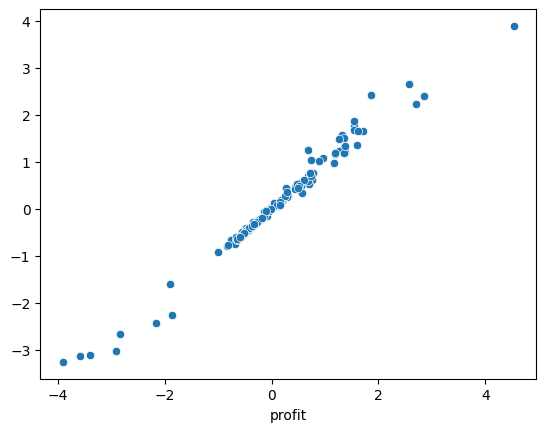

In [40]:
sns.scatterplot(y=y_pred, x=y_test)

### Linear Regression 

In [41]:
from sklearn.linear_model import LinearRegression 

# #Split the date into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)


# save the model with pickle
Linear_regression = 'Linear_regression.pkl'
pickle.dump(Linear_regression, open(Linear_regression, 'wb'))

#Make predictions on test set
y_pred = lr.predict(X_test)

#Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)


print('Linear Regression Perfomance Metrics')
print ('MAE:', mae)
print ('R2:', r2)
print ('RMSE', rmse)
print('MSE',mse )

Linear Regression Perfomance Metrics
MAE: 5.748938753320508e-16
R2: 1.0
RMSE 7.409229704399936e-16
MSE 5.489668481256236e-31


<Axes: xlabel='profit'>

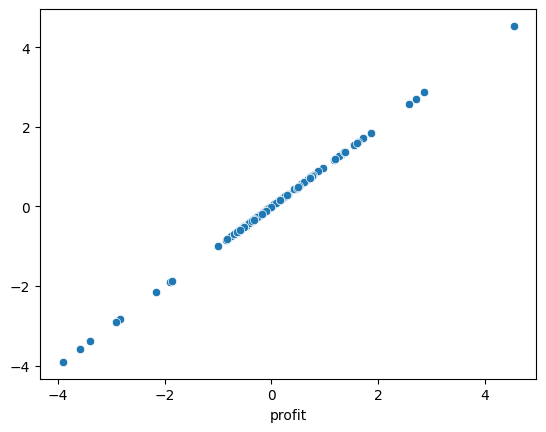

In [42]:
sns.scatterplot(y=y_pred, x=y_test)

### Decision Tree Regression

In [43]:
from sklearn.tree import DecisionTreeRegressor

# #Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create and fit the model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)


# save the model with pickle
Decision_Tree_regression = 'Decision_Tree_regression.pkl'
pickle.dump(Decision_Tree_regression, open(Decision_Tree_regression, 'wb'))


#Make predictions on test set
y_pred = dtr.predict(X_test)


#Calculate mean adsolute error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)


print('Decision Tree Regression Perfomance Metrics')
print ('MAE:', mae)
print ('R2:', r2)
print ('RMSE', rmse)
print('MSE',mse )

Decision Tree Regression Perfomance Metrics
MAE: 0.05046740336661163
R2: 0.9679938817457598
RMSE 0.16604982792111717
MSE 0.02757254535263262


<Axes: xlabel='profit'>

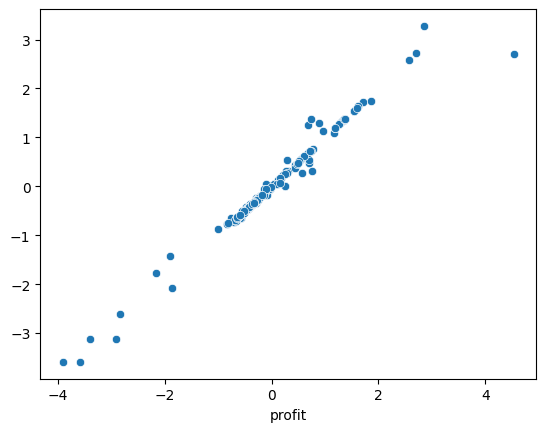

In [44]:
sns.scatterplot(y=y_pred, x=y_test)

### Gradient Boosting Regression 

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# #split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Create and fit the model
gbr = GradientBoostingRegressor(n_estimators = 100, random_state=42)
gbr.fit(X_train, y_train)


# save the model with pickle
Gradient_Boosting_regression = 'Gradient_Boosting_regression.pkl'
pickle.dump(Gradient_Boosting_regression, open(Gradient_Boosting_regression, 'wb'))

#Make predictions on test set
y_pred = gbr.predict(X_test)

#Caclate mean absolute error

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)


print('Gradient Boosting Regression Perfomance Metrics')
print ('MAE:', mae)
print ('R2:', r2)
print ('RMSE', rmse)
print('MSE',mse )

Gradient Boosting Regression Perfomance Metrics
MAE: 0.053474482423205794
R2: 0.9858433139800533
RMSE 0.11043398072411562
MSE 0.012195664098574338


<Axes: xlabel='profit'>

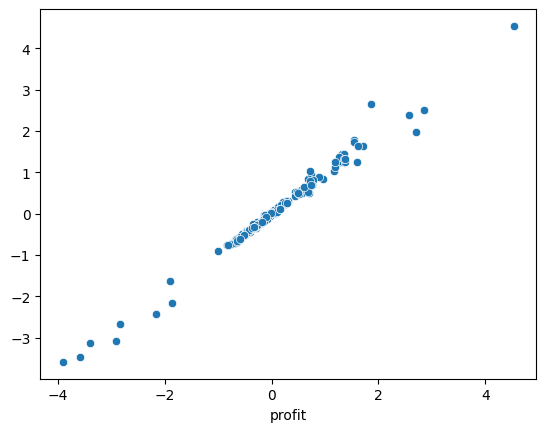

In [46]:
sns.scatterplot(y=y_pred, x=y_test)